In [1]:
# Import relevant packages 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config IPCompleter.greedy=True

In [2]:
# import the data file
df= pd.read_csv("D:/python/mkopa/Data Science assessment.csv")

#  Exploratory data analysis

In [3]:
# view the first 5 rows of the data
df.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,12/8/2012,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2/20/2015,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,10/28/2013,2000,50,365,3470,4820,13720,Active


In [4]:
# Summary statistics
df.describe()

,TotalPrice,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360
count,9195.000000,9195.000000,9195.000000,9195.0,9195.000000,9195.000000,9195.000000
mean,19266.264274,2311.528004,46.451332,365.0,3580.482762,4735.672974,14673.833061
std,6053.291677,1412.612091,13.375759,0.0,2487.320211,2756.332798,6676.242654
min,13775.000000,1000.000000,35.000000,365.0,-3200.000000,-3200.000000,-3200.000000
25%,16600.000000,2000.000000,40.000000,365.0,2500.000000,3437.500000,11351.000000
50%,16600.000000,2000.000000,40.000000,365.0,3351.000000,4400.000000,15140.000000
75%,20250.000000,2000.000000,50.000000,365.0,4601.000000,5668.000000,16600.000000
max,69225.000000,9000.000000,165.000000,365.0,26001.000000,33501.000000,69225.000000


In [5]:
# we explore the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 13 columns):
Product           9195 non-null object
CustomerGender    9195 non-null object
Location          9195 non-null object
Region            9195 non-null object
TotalPrice        9195 non-null int64
StartDate         9195 non-null object
Deposit           9195 non-null int64
DailyRate         9195 non-null int64
TotalDays         9195 non-null int64
AmountPaid30      9195 non-null int64
AmountPaid60      9195 non-null int64
AmountPaid360     9195 non-null int64
LoanStatus360     9195 non-null object
dtypes: int64(7), object(6)
memory usage: 933.9+ KB


In [6]:
# What is the shape of our data?
print("Our data has got {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Our data has got 9195 rows and 13 columns.


In [7]:
# Total number of unique values per column
df.nunique()

Product              6
CustomerGender       3
Location           791
Region              18
TotalPrice          10
StartDate         1517
Deposit              6
DailyRate            5
TotalDays            1
AmountPaid30      1363
AmountPaid60      1714
AmountPaid360     3367
LoanStatus360        3
dtype: int64

In [8]:
df['CustomerGender'].value_counts()
# We observe that we have three categories of gender 

Male            5358
Female          3290
NotSpecified     547
Name: CustomerGender, dtype: int64

In [9]:
df['LoanStatus360'].value_counts()
# We observe that we have 3 categories of LoanStatus360

Active              6742
Finished Payment    1604
Blocked              849
Name: LoanStatus360, dtype: int64

In [10]:
# Distribution of LoanStatus360 accross customer gender
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df.LoanStatus360, df.CustomerGender).style.background_gradient(cmap = cm)

CustomerGender,Female,Male,NotSpecified
LoanStatus360,,,
Active,2534,3891,317
Blocked,266,529,54
Finished Payment,490,938,176


In [11]:
# Distribution of LoanStatus360 accross the six products
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df.LoanStatus360, df.Product).style.background_gradient(cmap = cm)

Product,Product A,Product B,Product C,Product D,Product E,Product F
LoanStatus360,,,,,,
Active,2550,2784,591,625,189,3
Blocked,253,435,81,73,6,1
Finished Payment,338,643,327,277,18,1


In [12]:
# Distribution of LoanStatus360 accross TotalPrice
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df.LoanStatus360, df.TotalPrice).style.background_gradient(cmap = cm)

TotalPrice,13775,15600,16600,19250,20250,20750,22250,53625,54625,69225
LoanStatus360,,,,,,,,,,
Active,55,536,2803,882,893,140,1241,2,187,3
Blocked,0,81,439,94,111,11,106,0,6,1
Finished Payment,7,320,646,32,285,8,287,0,18,1


In [13]:
# Distribution of LoanStatus360 accross daily rates
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df.LoanStatus360, df.DailyRate).style.background_gradient(cmap = cm)

DailyRate,35,40,50,125,165
LoanStatus360,,,,,
Active,55,3339,3156,189,3
Blocked,0,520,322,6,1
Finished Payment,7,966,612,18,1


In [14]:
# Distribution of LoanStatus360 accross regions
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df.LoanStatus360, df.Region).style.background_gradient(cmap = cm)

Region,Region 1,Region 10,Region 11,Region 12,Region 13,Region 14,Region 15,Region 16,Region 17,Region 18,Region 2,Region 3,Region 4,Region 5,Region 6,Region 7,Region 8,Region 9
LoanStatus360,,,,,,,,,,,,,,,,,,
Active,857,29,8,25,55,20,10,8,8,10,1004,1496,422,126,2133,494,21,16
Blocked,155,4,0,4,0,2,3,1,2,2,142,142,54,10,262,54,9,3
Finished Payment,220,5,4,10,7,3,9,2,4,4,218,303,112,62,539,74,14,14


# We convert categorical variables to integer data types for regression purpose

In [15]:
# We conert gender to 0 if Female, 1 if Male and 2 if NotSpecified
def get_gender(x):
    if x == 'Female':
        sex = 0
    elif x== 'Male':
        sex = 1
    else:
        sex = 2
    return sex
df['Gender'] = df['CustomerGender'].apply(get_gender)

In [16]:
# We extract the Region and Location numbers and use them to represent the respective variables
df['RegionCode'] = df['Region'].str.extract('(\d+)').astype(np.int64)
df['LocationCode'] = df['Location'].str.extract('(\d+)').astype(np.int64)
df.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360,Gender,RegionCode,LocationCode
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active,1,2,2
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active,1,3,3
2,Product C,Female,Location 5,Region 5,15600,12/8/2012,1000,40,365,2160,3280,15340,Active,0,5,5
3,Product B,Male,Location 6,Region 1,16600,2/20/2015,2000,40,365,3041,4241,15321,Active,1,1,6
4,Product D,Female,Location 7,Region 2,20250,10/28/2013,2000,50,365,3470,4820,13720,Active,0,2,7


In [17]:
# For the prodcts we replace the alphabets A to F with 1 to 6 
def get_product_code(x):
    if x == 'Product A':
        code = 1
    elif x == 'Product B':
        code = 2
    elif x== 'Product C':
        code=3
    elif x== 'Product D':
        code = 4
    elif x == 'Product E':
        code = 5
    elif x == 'Product F':
        code = 6
    else:
        print("Wrong Product")
    return code
df['ProductCode'] = df['Product'].apply(get_product_code)
df.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360,Gender,RegionCode,LocationCode,ProductCode
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active,1,2,2,2
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active,1,3,3,2
2,Product C,Female,Location 5,Region 5,15600,12/8/2012,1000,40,365,2160,3280,15340,Active,0,5,5,3
3,Product B,Male,Location 6,Region 1,16600,2/20/2015,2000,40,365,3041,4241,15321,Active,1,1,6,2
4,Product D,Female,Location 7,Region 2,20250,10/28/2013,2000,50,365,3470,4820,13720,Active,0,2,7,4


In [18]:
# For the LoanStatus360 we use 1 for Active, 2 for Blocked and 0 to represent Finished Payment 
def get_LoanStatus360_code(y):
    if y == 'Active':
        status = 1
    elif y == 'Finished Payment':
        status = 0
    elif y == 'Blocked':
        status = 2
    else:
        print("Enter correct status code")
    return status
df['LoanStatus'] = df['LoanStatus360'].apply(get_LoanStatus360_code)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 18 columns):
Product           9195 non-null object
CustomerGender    9195 non-null object
Location          9195 non-null object
Region            9195 non-null object
TotalPrice        9195 non-null int64
StartDate         9195 non-null object
Deposit           9195 non-null int64
DailyRate         9195 non-null int64
TotalDays         9195 non-null int64
AmountPaid30      9195 non-null int64
AmountPaid60      9195 non-null int64
AmountPaid360     9195 non-null int64
LoanStatus360     9195 non-null object
Gender            9195 non-null int64
RegionCode        9195 non-null int64
LocationCode      9195 non-null int64
ProductCode       9195 non-null int64
LoanStatus        9195 non-null int64
dtypes: int64(12), object(6)
memory usage: 1.3+ MB


In [19]:
# We select only the columns with integer data types
df = df.loc[:, df.dtypes == np.int64]
df.head()

,TotalPrice,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,Gender,RegionCode,LocationCode,ProductCode,LoanStatus
0,16600,2000,40,365,3121,4241,13621,1,2,2,2,1
1,16600,2000,40,365,3061,4171,15041,1,3,3,2,1
2,15600,1000,40,365,2160,3280,15340,0,5,5,3,1
3,16600,2000,40,365,3041,4241,15321,1,1,6,2,1
4,20250,2000,50,365,3470,4820,13720,0,2,7,4,1


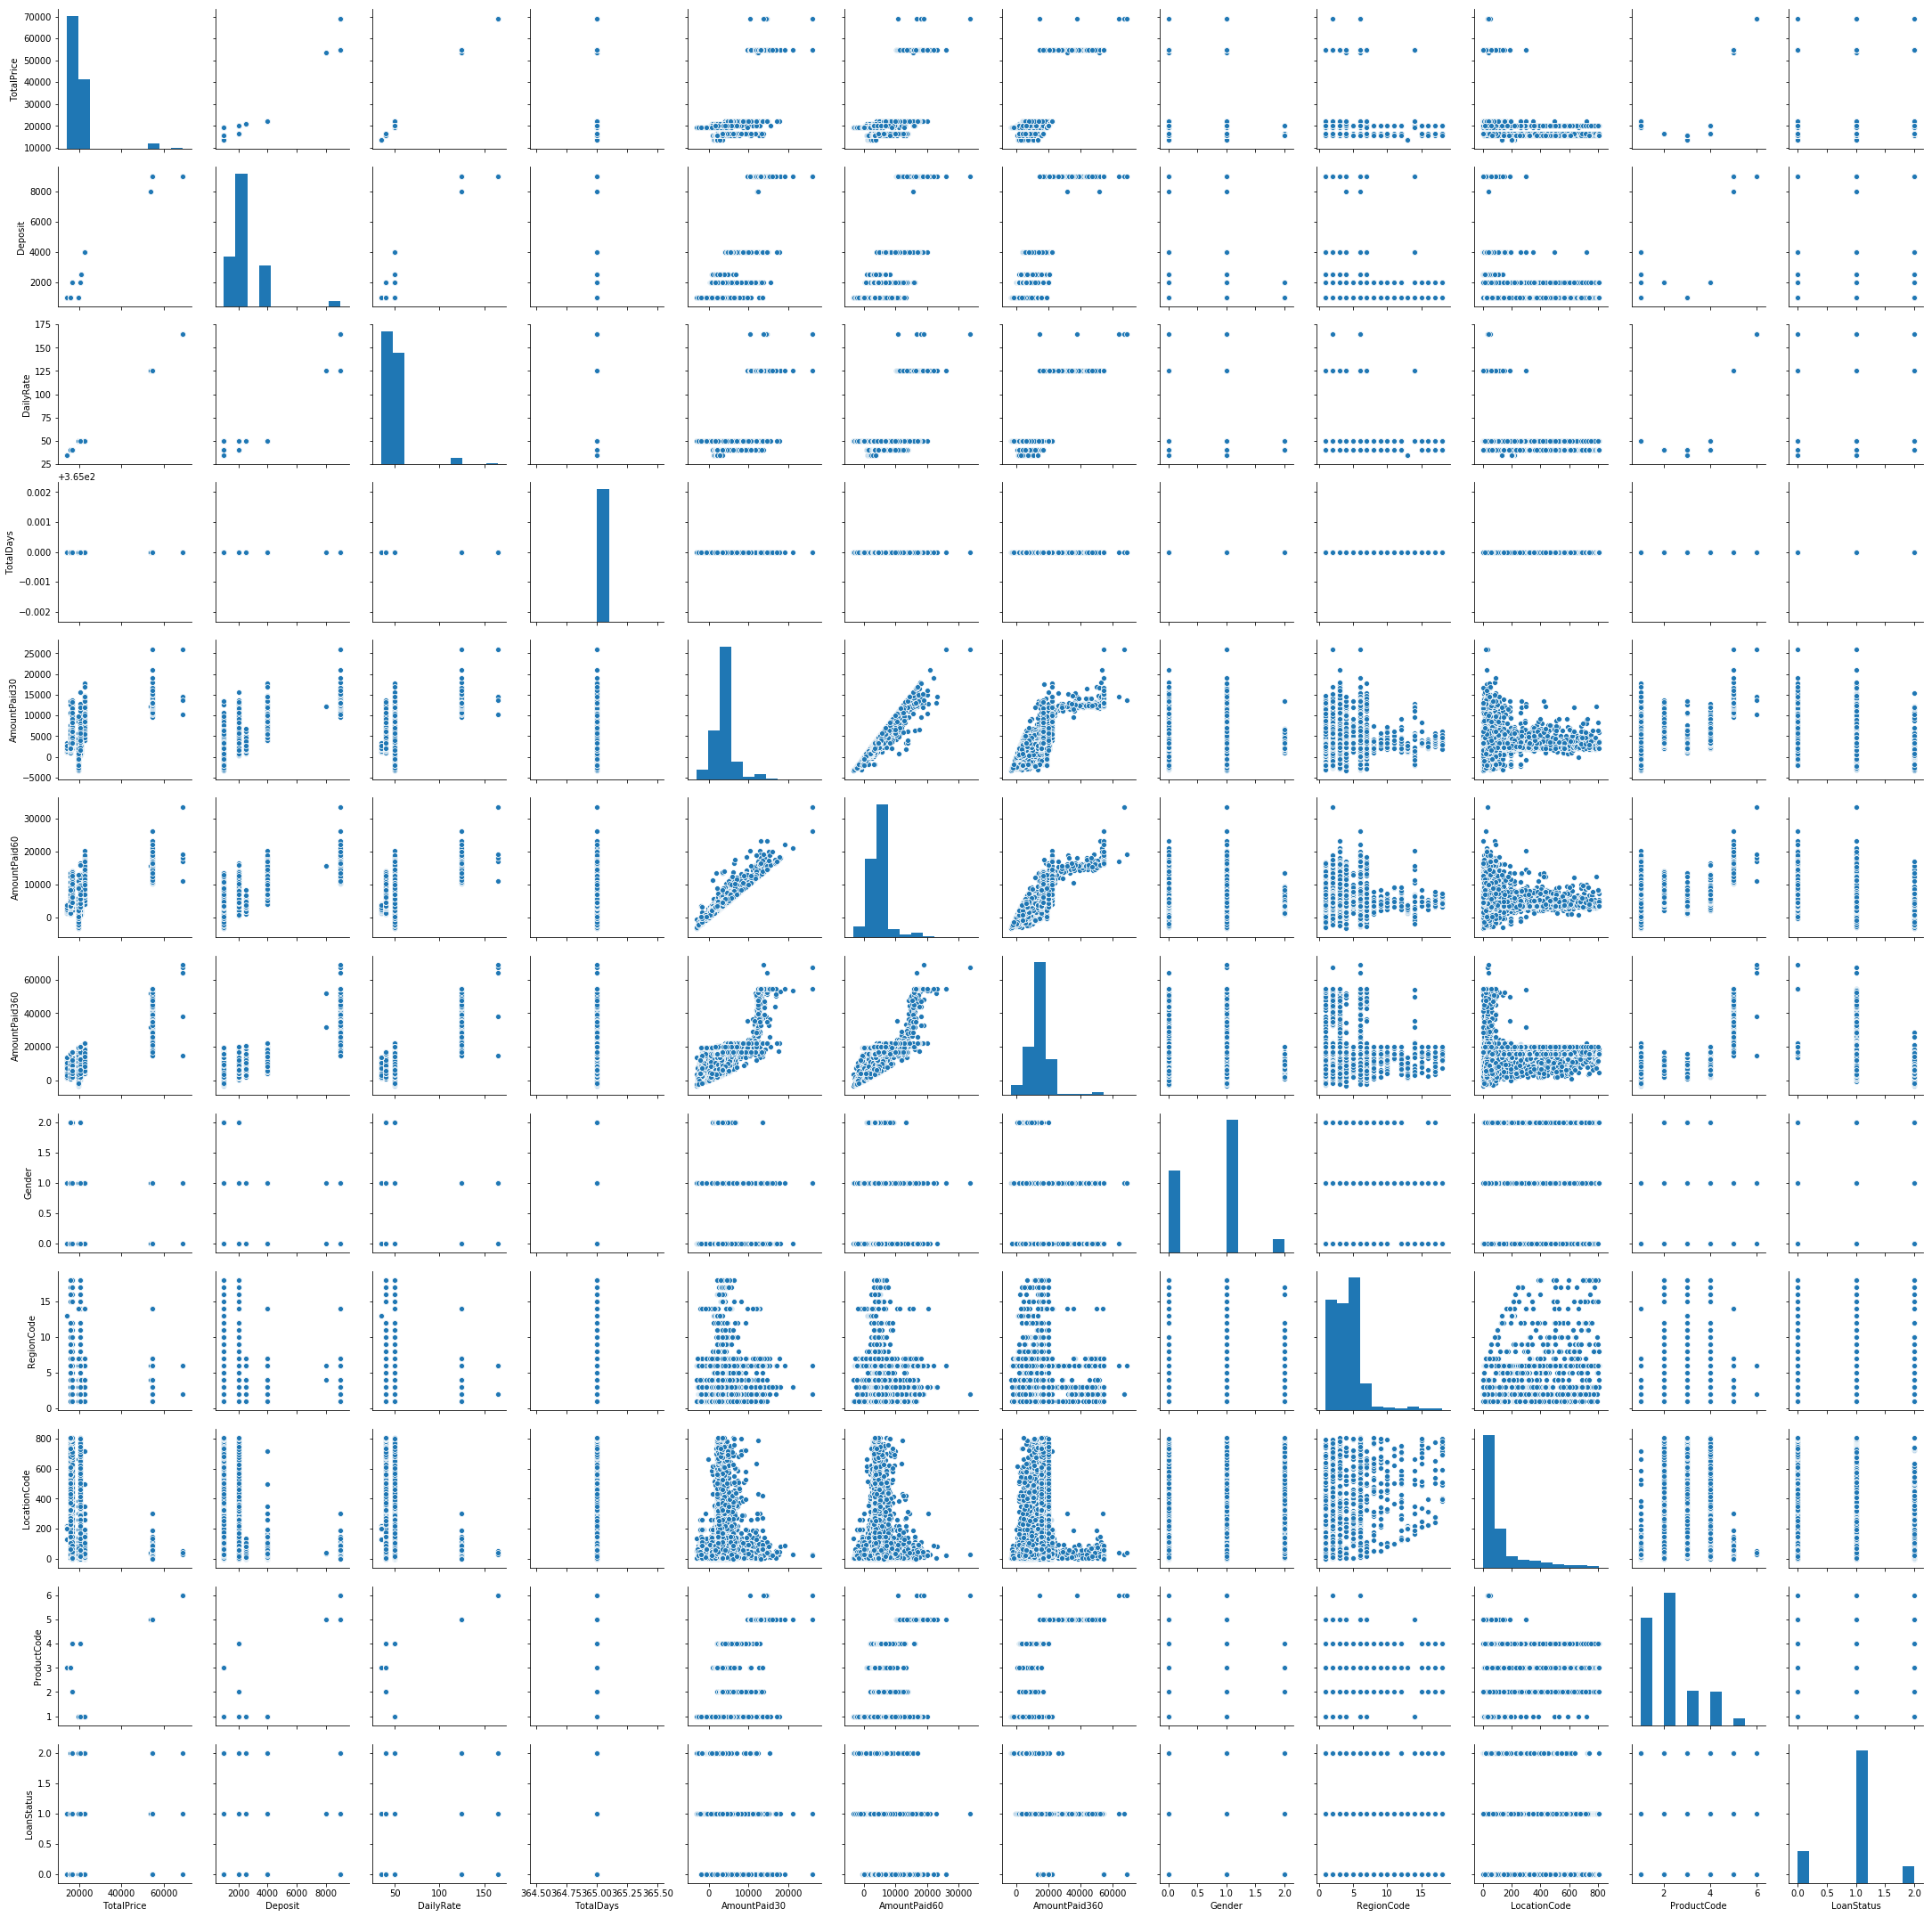

In [20]:
# we create a pairplot to visualize correlations 
sns.pairplot(df)

#  Regression Model
## Quantify the association of features and AmountPaid360
We can already see some potentially interesting relationships between the target variable (AmountPaid360) and the feature variables (the remaining columns).

To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:

    0.2 = weak
    0.5 = medium
    0.8 = strong
    0.9 = very strong

In [21]:
# Compute the correlation coefficent for all column pairs
corr_columns = df.corr()
corr_columns

,TotalPrice,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,Gender,RegionCode,LocationCode,ProductCode,LoanStatus
TotalPrice,1.000000,0.865541,0.989444,NaN,0.632335,0.681244,0.690308,-0.061481,-0.026921,-0.139609,0.277385,0.011786
Deposit,0.865541,1.000000,0.783827,NaN,0.804119,0.812502,0.662663,-0.112199,-0.029810,-0.216205,0.082856,-0.003819
DailyRate,0.989444,0.783827,1.000000,NaN,0.551355,0.609571,0.664164,-0.043765,-0.024753,-0.110541,0.319951,0.015718
TotalDays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmountPaid30,0.632335,0.804119,0.551355,NaN,1.000000,0.962193,0.675891,-0.019342,0.004796,-0.040955,0.305128,-0.188814
AmountPaid60,0.681244,0.812502,0.609571,NaN,0.962193,1.000000,0.751244,-0.019891,0.006507,-0.043252,0.319479,-0.225388
AmountPaid360,0.690308,0.662663,0.664164,NaN,0.675891,0.751244,1.000000,-0.001685,0.006789,-0.037544,0.300054,-0.434249
Gender,-0.061481,-0.112199,-0.043765,NaN,-0.019342,-0.019891,-0.001685,1.000000,0.051531,0.223331,0.215410,-0.045867
RegionCode,-0.026921,-0.029810,-0.024753,NaN,0.004796,0.006507,0.006789,0.051531,1.000000,0.237065,0.052733,-0.029180
LocationCode,-0.139609,-0.216205,-0.110541,NaN,-0.040955,-0.043252,-0.037544,0.223331,0.237065,1.000000,0.401861,-0.095200


In [22]:
# From the above table, we can drop the TotalDays column as it is not correlated with the rest of the columns
df = df.drop('TotalDays', axis=1)

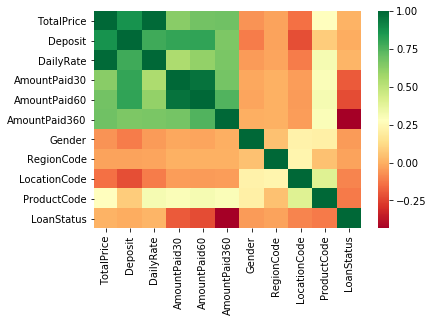

In [23]:
# we create a heatmap to visualize correlations 
sns.heatmap(df.corr(), cmap='RdYlGn')

# Fitting a multivariate linear regression
From the correlation table, we see that the AmountPaid360 is most strongly correlated with AmountPaid60. But in addition, we also see that some of the features are correlated with each other, for instance, TotalPrice and Deposit are positively correlated. We, therefore, want to compute the association of the target with each feature while adjusting for the effect of the remaining features. This can be done using multivariate linear regression.

Both the multivariate regression and the correlation measure how strongly the features are associated with the outcome (AmountPaid360). When comparing the regression coefficients with the correlation coefficients, we will see that they are slightly different. The reason for this is that the multiple regression computes the association of a feature with an outcome, given the association with all other features, which is not accounted for when calculating the correlation coefficients.


In [24]:
# Import the linear model function from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# We subset our data into 3 datasets using LoanStatus360
df1=df[df.LoanStatus == 1] #Active
df2= df[df.LoanStatus == 2] #Blocked
df3 = df[df.LoanStatus == 0] #Finished Payment

# Create the features and target DataFrames using Active accounts
X = df1.drop('AmountPaid360', axis=1).values # features
y = df1['AmountPaid360'].values  #target variable

# Spliting X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create a linear regression object
reg = LinearRegression()

# Fit a multivariate linear regression model
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# The coefficients
# print('Coefficients: \n', reg.coef_)
print('TotalPrice coefficient is: {}'.format(reg.coef_[0]))
print('Deposit coefficient is: {}'.format(reg.coef_[1]))
print('DailyRate coefficient is: {}'.format(reg.coef_[2]))
print('AmountPaid30 coefficient is: {}'.format(reg.coef_[3]))
print('AmountPaid60 coefficient is: {}'.format(reg.coef_[4]))
print('Gender coefficient is: {}'.format(reg.coef_[5]))
print('RegionCode coefficient is: {}'.format(reg.coef_[6]))
print('LocationCode coefficient is: {}'.format(reg.coef_[7]))
print('ProductCode coefficient is: {}'.format(reg.coef_[8]))
print('LoanStatus360 coefficient is: {}'.format(reg.coef_[9]))

# We extract the Intercept
print('The intercept is: \n', reg.intercept_)

# The mean squared error
print("The mean squared error is: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('The variance score is: %.2f' % r2_score(y_test, y_pred))

TotalPrice coefficient is: 0.5543049696487808
Deposit coefficient is: -1.6845470353160792
DailyRate coefficient is: 0.006133841109889946
AmountPaid30 coefficient is: -1.314084873771903
AmountPaid60 coefficient is: 2.8902892935145927
Gender coefficient is: 217.7214588022202
RegionCode coefficient is: -9.961156267849118
LocationCode coefficient is: 0.002976131015260816
ProductCode coefficient is: -371.5479666327832
LoanStatus360 coefficient is: 0.0
The intercept is: 
 -149.5456562914551
The mean squared error is: 10997833.87
The variance score is: 0.71


In [25]:
# To predict AmountPaid360 for active accounts, enter features in order of TotalPrice, Deposit, DailyRate, AmountPaid30, AmountPaid60, Gender, RegionCode, LocationCode, ProductCode, LoanStatus
# Below is an example of how to make a prediction. The observed walue for for the features is 13621, let us see the predicted value
reg.predict([[16600, 2000, 40, 3121, 4241, 1, 2, 2, 2, 1]])

array([13294.23529091])

# Classification model to predict LoanStatus360
   ## We use KNeighborsClassifier 

In [26]:
# We import the relevant packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn import metrics

# We make a copy of our data for use in the Classification model
df4 = df.copy()
target = df4['LoanStatus'].values
features = df4.drop('LoanStatus', axis=1).values

In [27]:
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6436, 10)
(6436,)
(2759, 10)
(2759,)


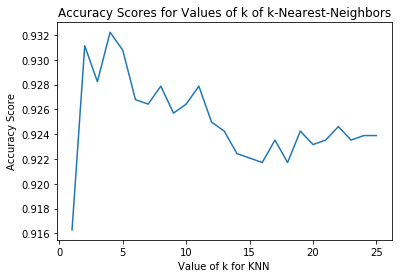

In [28]:
# We experiment with different n values to find the one with the highest accuracy score
scores = []
for k in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(range(1, 26), scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [29]:
# From the above curve, we can choose 4 neighbors for our classification model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(features, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [30]:
# We use Logistic regression to evaluate the accuarcy of our model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Our classification model predicts at {} percent accuracy level for Active accounts.".format(np.round(metrics.accuracy_score(y_test, y_pred), 4)*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       0.94      0.99      0.96      2041
           2       0.84      0.49      0.62       250

   micro avg       0.94      0.94      0.94      2759
   macro avg       0.92      0.83      0.86      2759
weighted avg       0.94      0.94      0.94      2759

[[ 468    0    0]
 [   1 2016   24]
 [   0  128  122]]
Our classification model predicts at 94.45 percent accuracy level for Active accounts.


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## From the classification report, our model predicts LoanStatus360 at:
    100% precision for Finished Payment accounts
    94% precision for Active accounts
    84% precision for Blocked accounts  

In [31]:
# To make a prediction for an example of an out-of-sample observation
# Enter features in order of TotalPrice, Deposit, DailyRate, AmountPaid30, AmountPaid60, AmountPaid360, Gender, RegionCode, LocationCode, ProductCode
#  Output is 1 for an Actice status, 2 for a Blocked status, 0 for a Finished Payment status
# We see an example below where the observed status for the features is Finished Payment
knn.predict([[20250, 2000, 50, 3601, 4301, 20250, 0, 2, 30, 1]])

array([0], dtype=int64)

# Challenges faced in building the models
    1.) Too many categorical data. I would instead focus more on collecting int type features like the Income level, size of the family, age.
    2.) Going forward, I would build multiple regression models for different Product types, gender, regions to explore if there are different correlations from the different sub groups/regions

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.3, random_state=109)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.730699528814788

In [43]:
model.predict([[20250, 2000, 50, 3601, 4301, 20250, 0, 2, 30, 1]])

array([1], dtype=int64)